Stock Market Analysis 

####Basic Analysis of Stock Information

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [3]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

C:\Users\bcroarkin\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


Let's use Yahoo and pandas to grab some data for some tech stocks.

In [4]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    

Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [5]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,106.982846,108.060198,105.849407,106.980435,4.694294e+07,105.902011
std,9.736900,9.750061,9.657088,9.701026,2.128842e+07,9.087203
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,90.339996
25%,97.320000,98.269997,96.580002,97.339996,3.278940e+07,97.139999
50%,108.010002,109.000000,106.449997,107.480003,4.208480e+07,106.481689
75%,114.580002,115.580002,113.330002,114.639999,5.484360e+07,112.876533
max,132.850006,132.970001,130.699997,132.070007,1.622063e+08,129.419998


In [6]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-07-13 to 2016-07-12
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the stocks

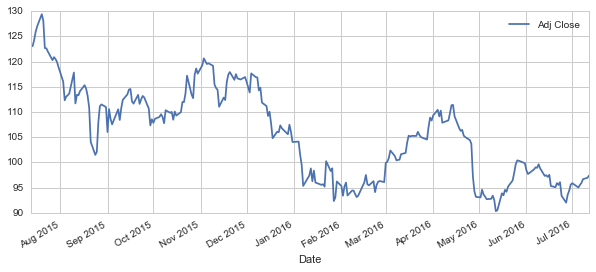

In [7]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

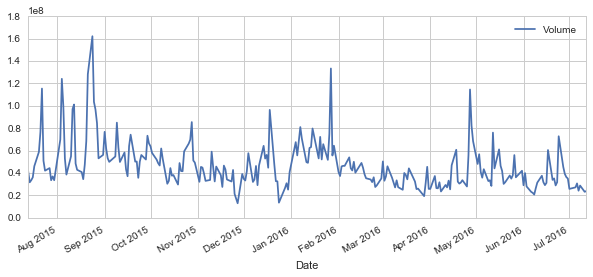

In [8]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

For more info on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [9]:
# Luckily pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

C:\Users\bcroarkin\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
C:\Users\bcroarkin\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
C:\Users\bcroarkin\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


Now let's go ahead and plot all the additional Moving Averages

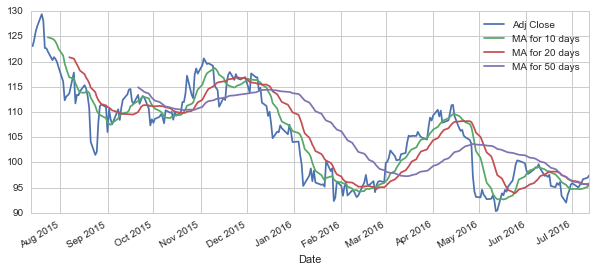

In [10]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

#### Section 2 - Daily Return Analysis

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

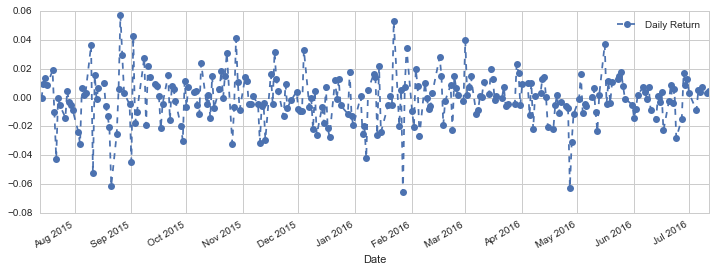

In [11]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

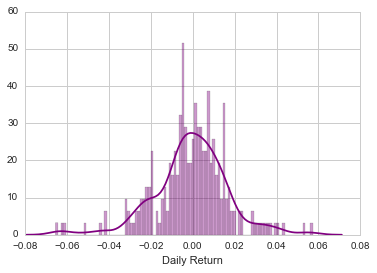

In [12]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

# Could have also done:
#AAPL['Daily Return'].hist()

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [13]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [14]:
# Let's take a quick look
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-07-13,123.138612,455.570007,546.549988,44.308496
2015-07-14,123.089612,465.570007,561.099976,44.386331
2015-07-15,124.275333,461.190002,560.219971,44.522544
2015-07-16,125.931417,475.480011,579.849976,45.398208
2015-07-17,127.019145,483.010010,672.929993,45.359288


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [15]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

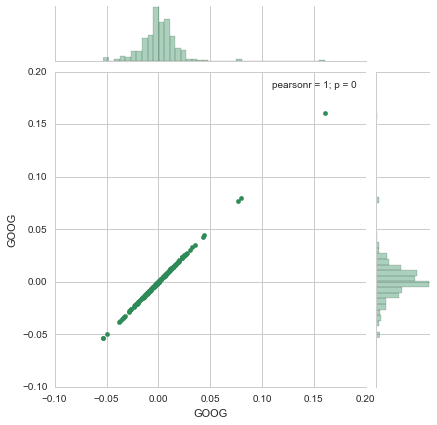

In [16]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.

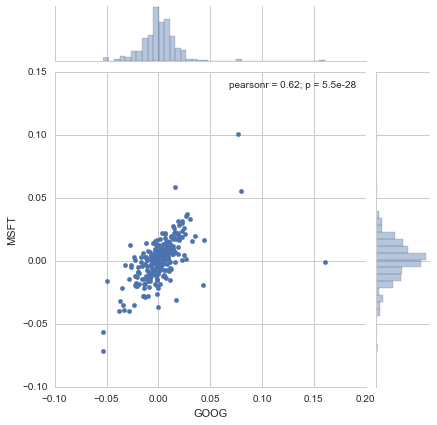

In [17]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

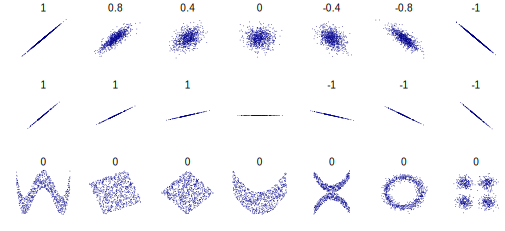

In [18]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

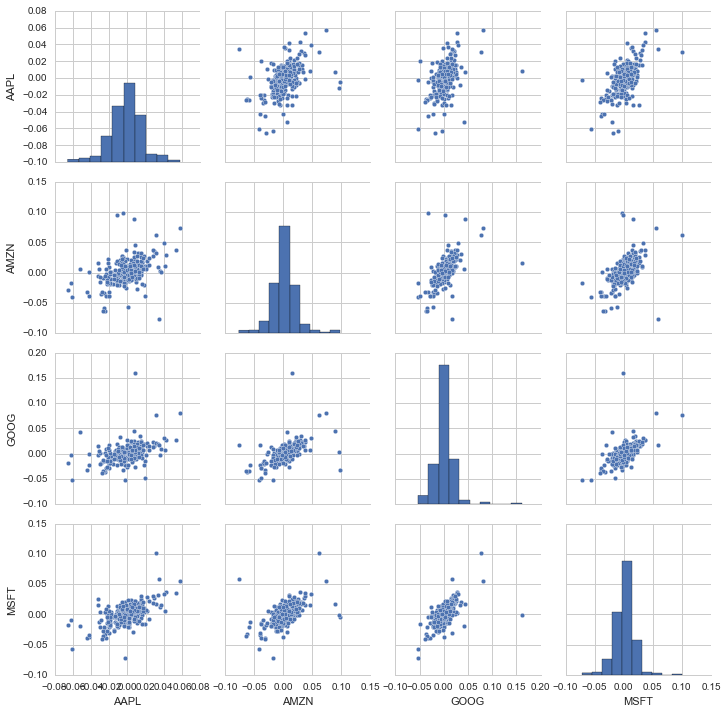

In [19]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Can you use it to achieve that.

# Great job!